<a href="https://colab.research.google.com/github/Ami03sa/Openai_projects-/blob/Image_creator/Copy_of_DALLE_3_API_Working_with_Images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 AI-powered art with the DALL-E API!



# 2. Libraries import

In [5]:
pip install openai

In [3]:
import os
import openai

from openai import OpenAI

# 3. Sending a first request to OpenAI API


### 3.1 Setting up API Key

In [41]:
os.environ["OPENAI_API_KEY"] = ""
client = OpenAI()

# 4. Generating images with DALLE



In [1]:
import matplotlib.pyplot as plt
from PIL import Image
import requests
from io import BytesIO

# Function to display image from a given URL
def show_image_from_url(url):
    response = requests.get(url)                # Send a GET request to the image URL
    img = Image.open(BytesIO(response.content)) # Open the image from the bytes in the response
    plt.imshow(img)                             # Use Matplotlib to display the image
    plt.axis('off')                             # Hide the axis to only show the image
    plt.show()



## Generating images

In [6]:
# Saving image from the original prompt
def save_image_from_url(url, file_path):
    response = requests.get(url)
    if response.status_code == 200:  # Check if the request was successful
        with open(file_path, 'wb') as f:  # Open a file in binary write mode
            f.write(response.content)  # Write the content of the response to the file
        print(f"Image saved at {file_path}")
    else:
        print(f"Error: Unable to retrieve image. Status code: {response.status_code}")

In [21]:
response = client.images.generate(
  model="dall-e-3",
  prompt="NBA team los angeles lakers pixel logo",
  size="1024x1024",
  quality="standard",
  n=1,
)

In [17]:
image_url = response.data[0].url

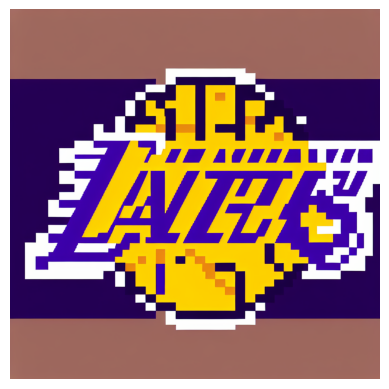

In [18]:
show_image_from_url(image_url)

## Editing images

If this website is online, use this one to create masks: https://ai-image-editor.netlify.app/


In [37]:
from PIL import Image

# Open the base image
img = Image.open("lakers.png")
w, h = img.size  # this will be (389, 389)

# Open the mask and resize it to match the base image
mask = Image.open("mask.png")
resized_mask = mask.resize((w, h), Image.Resampling.LANCZOS)
resized_mask.save("resized_mask.png")


In [39]:
res = client.images.edit(
    image=open("lakers.png","rb"),
    mask=open("resized_mask.png","rb"),
    prompt="NBA pixel logo",
    n=1,
    size="1024x1024"
)

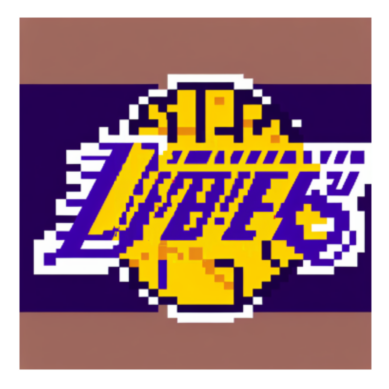

In [40]:
for image in res.data:
    show_image_from_url(image.url)